In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from MyNLP import WordDivider


list = []
df1 = pd.read_csv('CSV/corona_work_depression/corona_work_depression.csv', encoding='shift_jis', header=None)
df2 = pd.read_csv('CSV/corona_work_depression/corona_work_depression2.csv', encoding='shift_jis', header=None)
df3 = pd.read_csv('CSV/corona_work_depression/corona_work_depression3.csv', encoding='shift_jis', header=None)
df4 = pd.read_csv('CSV/corona_work_depression/corona_work_depression4.csv', encoding='cp932', header=None)
df5 = pd.read_csv('CSV/corona_work_depression/corona_work_depression5.csv', encoding='shift_jis', header=None)
df6 = pd.read_csv('CSV/corona_work_depression/corona_work_depression6.csv', encoding='shift_jis', header=None)
df7 = pd.read_csv('CSV/corona_work_depression/corona_work_depression7.csv', encoding='shift_jis', header=None)
df8 = pd.read_csv('CSV/corona_work_depression/corona_work_depression8.csv', encoding='shift_jis', header=None)
df9 = pd.read_csv('CSV/corona_work_depression/corona_work_depression9.csv', encoding='shift_jis', header=None)
df10 = pd.read_csv('CSV/corona_work_depression/corona_work_depression10.csv', encoding='shift_jis', header=None)
df11 = pd.read_csv('CSV/corona_work_depression/corona_work_depression11.csv', encoding='shift_jis', header=None)
df12 = pd.read_csv('CSV/corona_work_depression/corona_work_depression12.csv', encoding='shift_jis', header=None)
df13 = pd.read_csv('CSV/corona_work_depression/corona_work_depression13.csv', encoding='shift_jis', header=None)
df14 = pd.read_csv('CSV/corona_work_depression/corona_work_depression14.csv', encoding='shift_jis', header=None)
list.append(df1)
list.append(df2)
list.append(df3)
list.append(df4)
list.append(df5)
list.append(df6)
list.append(df7)
list.append(df8)
list.append(df9)
list.append(df10)
list.append(df11)
list.append(df12)
list.append(df13)
list.append(df14)
corona_work_depression = []
for index, comments in enumerate(list):
    if index == 1:
        corona_work_depression = comments.iloc[1:, 0].tolist()
    else:
        comments = comments.iloc[1:, 0].tolist()
        for comment in comments:
            corona_work_depression.append(comment)
            
wd = WordDivider()
keitaiso = [wd.wakati_text(text) for text in corona_work_depression]

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
vectorizer = CountVectorizer()
transformer = TfidfTransformer()
tf = vectorizer.fit_transform(keitaiso)
# tfidf = transformer.fit_transform(tf)
# print(tfidf.shape)
# print(tfidf[1])
# print(tfidf[1].toarray())

34

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(keitaiso)
print(tfidf.shape)
# print(tfidf[1])
# print(tfidf[1].toarray())

(130, 2181)


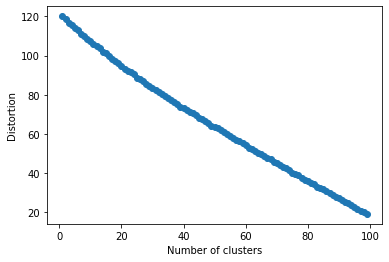

In [48]:
from sklearn.cluster import KMeans

distortions = []

for i in range(1, 100):
    km = KMeans(n_clusters=i,
                init='k-means++')
    km.fit(tfidf)
    distortions.append(km.inertia_)

plt.plot(range(1, 100),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

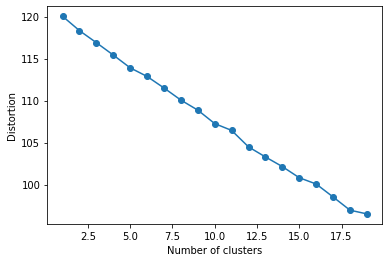

In [49]:
from sklearn.cluster import KMeans

distortions = []

for i in range(1, 20):
    km = KMeans(n_clusters=i,
                init='k-means++')
    km.fit(tfidf)
    distortions.append(km.inertia_)

plt.plot(range(1, 20),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [50]:
from sklearn.cluster import KMeans

km = KMeans(init='k-means++', n_clusters = 10)
result = km.fit(tfidf)
label = result.labels_
print(label)
u, counts = np.unique(label, return_counts=True)
print(u)
print(counts)
label = pd.DataFrame(label, columns=['cluster'])
comments = pd.DataFrame(corona_work_depression, columns=['comments'])
clustering_result = pd.concat([comments, label], axis=1)
clustering_result.to_csv("./clustering_result10.csv")

[5 1 2 1 4 5 5 0 1 1 5 6 0 5 1 7 5 5 4 5 7 9 7 0 1 2 5 4 1 4 5 3 1 5 6 2 9
 5 1 1 5 1 7 4 4 2 5 2 3 3 5 4 6 5 2 9 6 5 1 1 5 7 3 9 1 5 5 7 4 4 1 3 5 2
 0 2 5 7 6 5 9 1 5 2 5 6 7 5 7 4 1 1 7 6 5 9 5 5 2 4 1 1 3 6 6 2 9 7 4 5 3
 4 0 4 8 2 2 3 1 5 4 1 5 3 4 1 0 4 4 8]
[0 1 2 3 4 5 6 7 8 9]
[ 6 23 13  9 18 32  9 11  2  7]


In [51]:
from sklearn.cluster import KMeans

km = KMeans(init='k-means++',n_clusters = 100)
result = km.fit(tfidf)
label = result.labels_
print(label)
u, counts = np.unique(label, return_counts=True)
print(u)
print(counts)
label = pd.DataFrame(label, columns=['cluster'])
comments = pd.DataFrame(corona_work_depression, columns=['comments'])
clustering_result = pd.concat([comments, label], axis=1)
clustering_result.to_csv("./clustering_result100.csv")

[21 79  1 43 84 21 97  8 69 96 76 22 87 39 20 30  2 67 10  0  6 19 48 74
 99 17 95 24 90 27 58 86 30  2 91 94 13 28 29 65 76 26 15 18 50 20 76  1
 89  5 26 92 62 35 38 19 33  4 53 44 15  9 26 59 61 83 78 85 84 37 54 52
 47 42 93  1 81 55 31  4 80 64 98  1 72 45 77 60 73 66 88  7 34 23 40 56
  2 68 51 27 70 63 82  0 32 75 30 71 12 10 16 25 11 14  3 15  1 24 57 46
 12 36 10 16 41 49 11 25 14  3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[2 5 3 2 2 1 1 1 1 1 3 2 2 1 2 3 2 1 1 2 2 2 1 1 2 2 3 2 1 1 3 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 3 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [52]:
from sklearn.cluster import KMeans

km = KMeans(init='k-means++',n_clusters = 50)
result = km.fit(tfidf)
label = result.labels_
print(label)
u, counts = np.unique(label, return_counts=True)
print(u)
print(counts)
label = pd.DataFrame(label, columns=['cluster'])
comments = pd.DataFrame(corona_work_depression, columns=['comments'])
clustering_result = pd.concat([comments, label], axis=1)
clustering_result.to_csv("./clustering_result50.csv")

[38 10  2 38  4 38 24 30 49  4 24 26 49  8 11  4 24  5  0 42 46 37  8 21
 34 49 24 47 44  7  1  1  4  3 34  2 37  3 13 20  1 49 21  4 33 11 24  2
 40 40 29  4 39  6 28 37 41 10 23 40 21  4 29  5 27 41 38 13  5 32  4 48
 14  2  9  2  6 34  2 34  4  3 12  2  5 45 29 25  4 16 20 20 31  3 25 47
 34  4 36  7  1 22 10 42  3  5  4 43 17 18 10 19  9 15 35 21  2 47  4 49
 17 44 18 10 38 20  9 19 15 35]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[ 1  4  8  5 13  5  2  2  2  3  5  2  1  2  1  2  1  2  2  2  4  4  1  1
  5  2  1  1  1  3  1  1  1  1  5  2  1  3  5  1  3  2  2  1  2  1  1  3
  1  5]
